In [1]:
from IPython.display import display, HTML, clear_output

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 90%; }
    div#maintoolbar-container { width: 90%; }
</style>
"""))

import pandas as pd
import numpy as np
import os
import glob
import sys
import datetime
import json
from datetime import timedelta
from pathlib import Path
import time
import seaborn as sns
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyreadstat

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings. filterwarnings('ignore')

pd.options.display.html.table_schema = True
pd.set_option('display.max_columns', 500)

#alt.renderers.enable('notebook')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Load data
#df = pd.read_csv(r'C:\Users\croth\Documents\Northwestern University\MSDS 498\MSDS 498 - Capstone Group Project\Data\EDA_2024012\January_2023.csv')
#df = pd.read_csv(r'C:\Users\croth\Documents\Northwestern University\MSDS 498\MSDS 498 - Capstone Group Project\Data\EDA_2024012\1_year_merged.csv')
df = pd.read_csv(r'C:\Users\croth\Documents\Northwestern University\MSDS 498\MSDS 498 - Capstone Group Project\Data\EDA_2024012\5_years.csv')

df.columns = df.columns.str.lower()

df

id case_number                 date                      block  \
0        13211437    JG425074  2019-01-01 00:00:00         009XX N HAMLIN AVE   
1        11895528    JC515003  2019-01-01 00:00:00         059XX W LELAND AVE   
2        12325061    JE180772  2019-01-01 00:00:00      045XX S CHAMPLAIN AVE   
3        12298601    JE148751  2019-01-01 00:00:00        057XX S WOLCOTT AVE   
4        12312332    JE165297  2019-01-01 00:00:00            009XX W 76TH ST   
...           ...         ...                  ...                        ...   
1181134  13330925    JH106755  2023-12-31 00:00:00            004XX E 40TH ST   
1181135  13330361    JH106334  2023-12-31 00:00:00          046XX W MONROE ST   
1181136  13332523    JH109050  2023-12-31 00:00:00        021XX N LINCOLN AVE   
1181137  13332454    JH108711  2023-12-31 00:00:00          047XX W FULTON ST   
1181138  13333582    JH110244  2023-12-31 00:00:00  038XX S COTTAGE GROVE AVE   

         iucr             primary_type                          description  \
0        1562              SEX OFFENSE     AGGRAVATED CRIMINAL SEXUAL ABUSE   
1        1153       DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2        0265  CRIMINAL SEXUAL ASSAULT                   AGGRAVATED - OTHER   
3        1153       DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
4        0266  CRIMINAL SEXUAL ASSAULT                            PREDATORY   
...       ...                      ...                                  ...   
1181134  0486                  BATTERY              DOMESTIC BATTERY SIMPLE   
1181135  1585              SEX OFFENSE                                OTHER   
1181136  0890                    THEFT                        FROM BUILDING   
1181137  0610                 BURGLARY                       FORCIBLE ENTRY   
1181138  1120       DECEPTIVE PRACTICE                              FORGERY   

                location_description  arrest  domestic  beat  district  ward  \
0                          RESIDENCE   False     False  1112        11  27.0   
1                                NaN   False     False  1622        16  45.0   
2                          RESIDENCE   False     False   221         2   4.0   
3                          RESIDENCE   False     False   715         7  15.0   
4                          RESIDENCE   False     False   621         9  17.0   
...                              ...     ...       ...   ...       ...   ...   
1181134                    APARTMENT   False      True   214         2   3.0   
1181135                    RESIDENCE   False      True  1113        11  28.0   
1181136  RESIDENCE - PORCH / HALLWAY   False     False  1812        18  43.0   
1181137                    RESIDENCE   False     False  1113        11  28.0   
1181138                    APARTMENT   False     False   212         2   4.0   

         community_area fbi_code  year               updated_on  x_coordinate  \
0                  23.0       17  2019  2023-09-16T15:42:58.000           NaN   
1                  15.0       11  2019  2019-11-19T15:41:37.000           NaN   
2                  38.0       02  2019  2021-07-02T15:40:59.000           NaN   
3                  67.0       11  2019  2021-02-23T15:40:09.000           NaN   
4                  71.0       02  2019  2021-04-29T15:39:44.000     1174671.0   
...                 ...      ...   ...                      ...           ...   
1181134            38.0      08B  2023  2024-01-08T15:59:16.000     1180037.0   
1181135            25.0       17  2023  2024-01-08T15:59:16.000     1145450.0   
1181136             7.0       06  2023  2024-01-10T15:41:17.000     1172279.0   
1181137            25.0       05  2023  2024-01-10T15:41:17.000     1144721.0   
1181138            36.0       10  2023  2024-01-11T15:40:15.000     1182153.0   

         y_coordinate   latitude  longitude  location.latitude  \
0                 NaN        NaN        NaN                NaN   
1                 NaN      

In [4]:
# start_date = datetime.datetime.strptime('2023-12-24', '%Y-%m-%d')

# end_date = datetime.datetime.strptime('2024-12-24', '%Y-%m-%d')

# df = df[(df.date >= start_date) & (df.date < end_date)]

In [5]:
df['date'] = pd.to_datetime(df['date'])

df['dow'] = df.date.dt.weekday
df[['dow']] = df[['dow']].replace([0,1,2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

df.loc[((df.dow == 'Monday') | (df.dow == 'Tuesday') | (df.dow == 'Wednesday') | (df.dow == 'Thursday') | (df.dow == 'Friday')), 'daytype'] = 'Weekday'
df.loc[((df.dow == 'Saturday') | (df.dow == 'Sunday')), 'daytype'] = 'Weekend'

In [6]:
monthOrder = ['January','February','March','April','May','June','July','August','September','October','November','December']
dayOrder = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

In [7]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [8]:
df['month_num'] = df.date.str[5:7]
df['year'] = df.date.str[:4]

In [9]:
months = {'01' : 'January', '02' : 'February', '03' : 'March',
           '04' : 'April', '05' : 'May', '06' : 'June',
           '07' : 'July', '08' : 'August', '09' : 'September',
           '10' : 'October',   '11' : 'November',   '12' : 'December'}
df['month'] = df['month_num'].map(months)
df.sample(5)

id case_number        date  \
160933   11791069    JC388687  2019-08-11   
1093932  13193406    JG403670  2023-08-30   
450746   12224334    JD435035  2020-11-18   
658048   12546340    JE451557  2021-11-17   
601905   12462508    JE349274  2021-08-20   

                                       block  iucr         primary_type  \
160933   071XX S DR MARTIN LUTHER KING JR DR  0420              BATTERY   
1093932                      010XX W LAKE ST  0860                THEFT   
450746                    022XX N CICERO AVE  0860                THEFT   
658048                       018XX W 21ST ST  0910  MOTOR VEHICLE THEFT   
601905                      048XX N CLARK ST  1154   DECEPTIVE PRACTICE   

                                     description  \
160933            AGGRAVATED:KNIFE/CUTTING INSTR   
1093932                             RETAIL THEFT   
450746                              RETAIL THEFT   
658048                                AUTOMOBILE   
601905   FINANCIAL IDENTITY THEFT $300 AND UNDER   

                 location_description  arrest  domestic  beat  district  ward  \
160933                  PARK PROPERTY   False     False   323         3   6.0   
1093932  COMMERCIAL / BUSINESS OFFICE   False     False  1214        12  27.0   
450746             SMALL RETAIL STORE   False     False  2522        25  36.0   
658048                         STREET    True     False  1234        12  25.0   
601905                      APARTMENT   False     False  2032        20  47.0   

         community_area fbi_code  year               updated_on  x_coordinate  \
160933             69.0      04B  2019  2019-08-18T15:46:02.000     1180149.0   
1093932            28.0       06  2023  2023-09-07T15:43:29.000     1169328.0   
450746             19.0       06  2020  2020-12-17T15:40:05.000     1144030.0   
658048             31.0       07  2021  2021-12-04T15:40:26.000     1164499.0   
601905              3.0       11  2021  2021-08-27T15:40:24.000     1165272.0   

         y_coordinate   latitude  longitude  location.latitude  \
160933      1857867.0  41.765254 -87.615256          41.765254   
1093932     1901620.0  41.885557 -87.653649          41.885557   
450746      1914439.0  41.921246 -87.746227          41.921246   
658048      1890107.0  41.854068 -87.671708          41.854068   
601905      1932481.0  41.970329 -87.667664          41.970329   

         location.longitude  \
160933           -87.615256   
1093932          -87.653649   
450746           -87.746227   
658048           -87.671708   
601905           -87.667664   

                                    location.human_address  \
160933   {"address": "", "city": "", "state": "", "zip"...   
1093932  {"address": "", "city": "", "state": "", "zip"...   
450746   {"address": "", "city": "", "state": "", "zip"...   
658048   {"address": "", "city": "", "state": "", "zip"...   
601905   {"address": "", "city": "", "state": "", "zip"...   

         total_offenders_in_ca  total_complaints_in_ca        dow  daytype  \
160933                   127.0                    74.0     Sunday  Weekend   
1093932                   12.0                   328.0  Wednesday  Weekday   
450746                    44.0                   111.0  Wednesday  Weekday   
658048                    14.0                   296.0  Wednesday  Weekday   
601905                    16.0                   245.0     Friday  Weekday   

        month_num     month  
160933         08    August  
1093932        08    August  
450746         11  November  
658048         11  November  
601905         08    August

In [10]:
df.primary_type.unique()

array(['SEX OFFENSE', 'DECEPTIVE PRACTICE', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'OFFENSE INVOLVING CHILDREN', 'BATTERY', 'THEFT',
       'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'CRIM SEXUAL ASSAULT',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'WEAPONS VIOLATION', 'BURGLARY',
       'ASSAULT', 'CRIMINAL TRESPASS', 'NARCOTICS',
       'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'KIDNAPPING', 'INTIMIDATION',
       'STALKING', 'ARSON', 'CONCEALED CARRY LICENSE VIOLATION',
       'HOMICIDE', 'HUMAN TRAFFICKING', 'GAMBLING', 'OBSCENITY',
       'NON-CRIMINAL', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'RITUALISM'], dtype=object)

In [11]:
df.primary_type.nunique()

33

In [12]:
# 'CRIM SEXUAL ASSAULT' : 'violent_crime',
# 'HUMAN TRAFFICKING' : 'violent_crime', 
# 'NON-CRIMINAL' : 'nonviolent_crime', 
# 'OTHER NARCOTIC VIOLATION' : 'nonviolent_crime', 
# 'PUBLIC INDECENCY' : 'nonviolent_crime',
# 'RITUALISM' : 'violent_crime'

In [13]:
type_of_crime = {'CRIMINAL SEXUAL ASSAULT' : 'violent_crime', 
                'OFFENSE INVOLVING CHILDREN' : 'violent_crime', 
                'THEFT' : 'property_crime',
                'DECEPTIVE PRACTICE' : 'violent_crime', 
                'OTHER OFFENSE' : 'nonviolent_crime', 
                'BURGLARY' : 'property_crime',
                'CRIMINAL DAMAGE' : 'property_crime', 
                'CRIMINAL TRESPASS' : 'nonviolent_crime', 
                'WEAPONS VIOLATION' : 'nonviolent_crime',
                'BATTERY' : 'violent_crime', 
                'STALKING' : 'nonviolent_crime', 
                'ASSAULT' : 'violent_crime', 
                'SEX OFFENSE' : 'violent_crime',
                'MOTOR VEHICLE THEFT' : 'property_crime', 
                'OBSCENITY' : 'nonviolent_crime', 
                'PUBLIC PEACE VIOLATION' : 'nonviolent_crime',
                'LIQUOR LAW VIOLATION' : 'nonviolent_crime', 
                'ROBBERY' : 'violent_crime', 
                'HOMICIDE' : 'violent_crime', 
                'NARCOTICS' : 'nonviolent_crime',
                'ARSON' : 'property_crime', 
                'CONCEALED CARRY LICENSE VIOLATION' : 'nonviolent_crime',
                'INTERFERENCE WITH PUBLIC OFFICER' : 'nonviolent_crime', 
                'KIDNAPPING' : 'violent_crime', 
                'INTIMIDATION' : 'nonviolent_crime',
                'PROSTITUTION' : 'nonviolent_crime', 
                'GAMBLING' : 'nonviolent_crime',
                'CRIM SEXUAL ASSAULT' : 'violent_crime',
                'HUMAN TRAFFICKING' : 'violent_crime', 
                'NON-CRIMINAL' : 'nonviolent_crime', 
                'OTHER NARCOTIC VIOLATION' : 'nonviolent_crime', 
                'PUBLIC INDECENCY' : 'nonviolent_crime',
                'RITUALISM' : 'violent_crime'}

df['crime_category'] = df['primary_type'].map(type_of_crime)

df.sample(5)

id case_number        date                 block  iucr  \
616251  12479732    JE370204  2021-09-11       035XX W 66TH ST  0520   
984545  13031920    JG211023  2023-04-04    051XX S PULASKI RD  1210   
86383   11682057    JC256891  2019-05-09  034XX W MONTROSE AVE  041A   
116236  11733749    JC319536  2019-06-17   083XX S BRANDON AVE  0610   
774227  12722654    JF270999  2022-06-07       007XX W 87TH ST  0460   

              primary_type                              description  \
616251             ASSAULT  AGGRAVATED - KNIFE / CUTTING INSTRUMENT   
984545  DECEPTIVE PRACTICE                THEFT OF LABOR / SERVICES   
86383              BATTERY                      AGGRAVATED: HANDGUN   
116236            BURGLARY                           FORCIBLE ENTRY   
774227             BATTERY                                   SIMPLE   

                   location_description  arrest  domestic  beat  district  \
616251  RESIDENCE - YARD (FRONT / BACK)   False     False   831         8   
984545                       RESTAURANT   False     False   822         8   
86383                          SIDEWALK   False     False  1723        17   
116236                        RESIDENCE   False     False   424         4   
774227                           STREET   False     False  2223        22   

        ward  community_area fbi_code  year               updated_on  \
616251  23.0            66.0      04A  2021  2021-09-18T15:40:08.000   
984545  23.0            62.0       11  2023  2023-08-19T15:40:26.000   
86383   35.0            14.0      04B  2019  2019-05-16T16:08:26.000   
116236  10.0            46.0       05  2019  2019-06-30T15:41:21.000   
774227  21.0            71.0      08B  2022  2023-01-03T15:40:27.000   

        x_coordinate  y_coordinate   latitude  longitude  location.latitude  \
616251     1153892.0     1860623.0  41.773378 -87.711423          41.773378   
984545     1150575.0     1870061.0  41.799342 -87.723337          41.799342   
86383      1152693.0     1929030.0  41.961118 -87.714009          41.961118   
116236     1198931.0     1850292.0  41.744017 -87.546669          41.744017   
774227     1172915.0     1847102.0  41.735876 -87.642087          41.735876   

        location.longitude                             location.human_address  \
616251          -87.711423  {"address": "", "city": "", "state": "", "zip"...   
984545          -87.723337  {"address": "", "city": "", "state": "", "zip"...   
86383           -87.714009  {"address": "", "city": "", "state": "", "zip"...   
116236          -87.546669  {"address": "", "city": "", "state": "", "zip"...   
774227          -87.642087  {"address": "", "city": "", "state": "", "zip"...   

        total_offenders_in_ca  total_complaints_in_ca       dow  daytype  \
616251                   47.0                   115.0  Saturday  Weekend   
984545                    3.0                    28.0   Tuesday  Weekday   
86383                    18.0                   106.0  Thursday  Weekday   
116236                   68.0                    62.0    Monday  Weekday   
774227                   79.0                    92.0   Tuesday  Weekday   

       month_num      month  crime_category  
616251        09  September   violent_crime  
984545        04      April   violent_crime  
86383         05        May   violent_crime  
116236        06       June  property_crime  
774227        06       June   violent_crime

In [14]:
df.shape

(1181139, 31)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181139 entries, 0 to 1181138
Data columns (total 31 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1181139 non-null  int64  
 1   case_number             1181139 non-null  object 
 2   date                    1181139 non-null  object 
 3   block                   1181139 non-null  object 
 4   iucr                    1181139 non-null  object 
 5   primary_type            1181139 non-null  object 
 6   description             1181139 non-null  object 
 7   location_description    1174898 non-null  object 
 8   arrest                  1181139 non-null  bool   
 9   domestic                1181139 non-null  bool   
 10  beat                    1181139 non-null  int64  
 11  district                1181139 non-null  int64  
 12  ward                    1181091 non-null  float64
 13  community_area          1181137 non-null  float64
 14  fb

In [16]:
df.isnull().sum()

id                            0
case_number                   0
date                          0
block                         0
iucr                          0
primary_type                  0
description                   0
location_description       6241
arrest                        0
domestic                      0
beat                          0
district                      0
ward                         48
community_area                2
fbi_code                      0
year                          0
updated_on                    0
x_coordinate              17007
y_coordinate              17007
latitude                  17007
longitude                 17007
location.latitude         17007
location.longitude        17007
location.human_address    17007
total_offenders_in_ca     16723
total_complaints_in_ca        2
dow                           0
daytype                       0
month_num                     0
month                         0
crime_category                0
dtype: i

In [17]:
df.drop(['total_offenders_in_ca', 'total_complaints_in_ca'], axis=1, inplace=True)
df

id case_number        date                      block  iucr  \
0        13211437    JG425074  2019-01-01         009XX N HAMLIN AVE  1562   
1        11895528    JC515003  2019-01-01         059XX W LELAND AVE  1153   
2        12325061    JE180772  2019-01-01      045XX S CHAMPLAIN AVE  0265   
3        12298601    JE148751  2019-01-01        057XX S WOLCOTT AVE  1153   
4        12312332    JE165297  2019-01-01            009XX W 76TH ST  0266   
...           ...         ...         ...                        ...   ...   
1181134  13330925    JH106755  2023-12-31            004XX E 40TH ST  0486   
1181135  13330361    JH106334  2023-12-31          046XX W MONROE ST  1585   
1181136  13332523    JH109050  2023-12-31        021XX N LINCOLN AVE  0890   
1181137  13332454    JH108711  2023-12-31          047XX W FULTON ST  0610   
1181138  13333582    JH110244  2023-12-31  038XX S COTTAGE GROVE AVE  1120   

                    primary_type                          description  \
0                    SEX OFFENSE     AGGRAVATED CRIMINAL SEXUAL ABUSE   
1             DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2        CRIMINAL SEXUAL ASSAULT                   AGGRAVATED - OTHER   
3             DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
4        CRIMINAL SEXUAL ASSAULT                            PREDATORY   
...                          ...                                  ...   
1181134                  BATTERY              DOMESTIC BATTERY SIMPLE   
1181135              SEX OFFENSE                                OTHER   
1181136                    THEFT                        FROM BUILDING   
1181137                 BURGLARY                       FORCIBLE ENTRY   
1181138       DECEPTIVE PRACTICE                              FORGERY   

                location_description  arrest  domestic  beat  district  ward  \
0                          RESIDENCE   False     False  1112        11  27.0   
1                                NaN   False     False  1622        16  45.0   
2                          RESIDENCE   False     False   221         2   4.0   
3                          RESIDENCE   False     False   715         7  15.0   
4                          RESIDENCE   False     False   621         9  17.0   
...                              ...     ...       ...   ...       ...   ...   
1181134                    APARTMENT   False      True   214         2   3.0   
1181135                    RESIDENCE   False      True  1113        11  28.0   
1181136  RESIDENCE - PORCH / HALLWAY   False     False  1812        18  43.0   
1181137                    RESIDENCE   False     False  1113        11  28.0   
1181138                    APARTMENT   False     False   212         2   4.0   

         community_area fbi_code  year               updated_on  x_coordinate  \
0                  23.0       17  2019  2023-09-16T15:42:58.000           NaN   
1                  15.0       11  2019  2019-11-19T15:41:37.000           NaN   
2                  38.0       02  2019  2021-07-02T15:40:59.000           NaN   
3                  67.0       11  2019  2021-02-23T15:40:09.000           NaN   
4                  71.0       02  2019  2021-04-29T15:39:44.000     1174671.0   
...                 ...      ...   ...                      ...           ...   
1181134            38.0      08B  2023  2024-01-08T15:59:16.000     1180037.0   
1181135            25.0       17  2023  2024-01-08T15:59:16.000     1145450.0   
1181136             7.0       06  2023  2024-01-10T15:41:17.000     1172279.0   
1181137            25.0       05  2023  2024-01-10T15:41:17.000     1144721.0   
1181138            36.0       10  2023  2024-01-11T15:40:15.000     1182153.0   

         y_coordinate   latitude  longitude  location.latitude  \
0                 NaN        NaN        NaN                NaN   
1                 NaN        NaN        NaN                NaN   
2                 NaN        NaN        NaN                NaN   
3  

In [18]:
# Drop rows contains missing values
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

id case_number        date                      block  iucr  \
0        12312332    JE165297  2019-01-01            009XX W 76TH ST  0266   
1        12595842    JF116915  2019-01-01          026XX N SAYRE AVE  0486   
2        12631707    JF160360  2019-01-01           111XX S AVENUE O  1754   
3        13187275    JG387404  2019-01-01       030XX W MARQUETTE RD  0263   
4        13187280    JG387413  2019-01-01       030XX W MARQUETTE RD  0263   
...           ...         ...         ...                        ...   ...   
1159414  13330925    JH106755  2023-12-31            004XX E 40TH ST  0486   
1159415  13330361    JH106334  2023-12-31          046XX W MONROE ST  1585   
1159416  13332523    JH109050  2023-12-31        021XX N LINCOLN AVE  0890   
1159417  13332454    JH108711  2023-12-31          047XX W FULTON ST  0610   
1159418  13333582    JH110244  2023-12-31  038XX S COTTAGE GROVE AVE  1120   

                       primary_type  \
0           CRIMINAL SEXUAL ASSAULT   
1                           BATTERY   
2        OFFENSE INVOLVING CHILDREN   
3           CRIMINAL SEXUAL ASSAULT   
4           CRIMINAL SEXUAL ASSAULT   
...                             ...   
1159414                     BATTERY   
1159415                 SEX OFFENSE   
1159416                       THEFT   
1159417                    BURGLARY   
1159418          DECEPTIVE PRACTICE   

                                               description  \
0                                                PREDATORY   
1                                  DOMESTIC BATTERY SIMPLE   
2        AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...   
3                  AGGRAVATED - KNIFE / CUTTING INSTRUMENT   
4                  AGGRAVATED - KNIFE / CUTTING INSTRUMENT   
...                                                    ...   
1159414                            DOMESTIC BATTERY SIMPLE   
1159415                                              OTHER   
1159416                                      FROM BUILDING   
1159417                                     FORCIBLE ENTRY   
1159418                                            FORGERY   

                location_description  arrest  domestic  beat  district  ward  \
0                          RESIDENCE   False     False   621         9  17.0   
1                          APARTMENT   False      True  2512        25  36.0   
2                          RESIDENCE   False      True   433         4  10.0   
3                          RESIDENCE   False     False   831         8  15.0   
4                          RESIDENCE   False     False   831         8  15.0   
...                              ...     ...       ...   ...       ...   ...   
1159414                    APARTMENT   False      True   214         2   3.0   
1159415                    RESIDENCE   False      True  1113        11  28.0   
1159416  RESIDENCE - PORCH / HALLWAY   False     False  1812        18  43.0   
1159417                    RESIDENCE   False     False  1113        11  28.0   
1159418                    APARTMENT   False     False   212         2   4.0   

         community_area fbi_code  year               updated_on  x_coordinate  \
0                  71.0       02  2019  2021-04-29T15:39:44.000     1174671.0   
1                  18.0      08B  2019  2022-02-21T15:39:34.000     1129140.0   
2                  52.0       02  2019  2022-06-23T15:40:00.000     1200893.0   
3                  66.0       02  2019  2023-09-08T15:41:44.000     1157327.0   
4                  66.0       02  2019  2023-09-08T15:41:44.000     1157327.0   
...                 ...      ...   ...                      ...           ...   
1159414            38.0      08B  2023  2024-01-08T15:59:16.000     1180037.0   
1159415            25.0       17  2023  2024-01-08T15:59:16.000     1145450.0   
1159416             7.0       06  2023  2024-01-10T15:41:17.000     1172279.0   
1159417            25.0       05  2023  2024-01-10T15:41:17.000     1144721.0   
1159418     

In [19]:
df.isnull().sum()

id                        0
case_number               0
date                      0
block                     0
iucr                      0
primary_type              0
description               0
location_description      0
arrest                    0
domestic                  0
beat                      0
district                  0
ward                      0
community_area            0
fbi_code                  0
year                      0
updated_on                0
x_coordinate              0
y_coordinate              0
latitude                  0
longitude                 0
location.latitude         0
location.longitude        0
location.human_address    0
dow                       0
daytype                   0
month_num                 0
month                     0
crime_category            0
dtype: int64

In [20]:
df.nunique()

id                        1159419
case_number               1159266
date                         1826
block                       34856
iucr                          344
primary_type                   33
description                   472
location_description          187
arrest                          2
domestic                        2
beat                          275
district                       23
ward                           50
community_area                 77
fbi_code                       27
year                            5
updated_on                   3150
x_coordinate                66352
y_coordinate               107944
latitude                   319958
longitude                  319861
location.latitude          319958
location.longitude         319861
location.human_address          1
dow                             7
daytype                         2
month_num                      12
month                          12
crime_category                  3
dtype: int64

In [21]:
df.primary_type.unique()

array(['CRIMINAL SEXUAL ASSAULT', 'BATTERY', 'OFFENSE INVOLVING CHILDREN',
       'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'THEFT', 'OTHER OFFENSE',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'SEX OFFENSE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT',
       'CRIMINAL TRESPASS', 'NARCOTICS', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'KIDNAPPING', 'INTIMIDATION', 'STALKING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE', 'PROSTITUTION',
       'HUMAN TRAFFICKING', 'GAMBLING', 'OBSCENITY', 'NON-CRIMINAL',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'RITUALISM'],
      dtype=object)

In [22]:
df.crime_category.unique()

array(['violent_crime', 'property_crime', 'nonviolent_crime'],
      dtype=object)

In [23]:
df.crime_category.value_counts()

property_crime      506593
violent_crime       465856
nonviolent_crime    186970
Name: crime_category, dtype: int64

In [24]:
df.crime_category.value_counts()

property_crime      506593
violent_crime       465856
nonviolent_crime    186970
Name: crime_category, dtype: int64

In [25]:
df.district.value_counts()

6     74063
11    73369
8     72428
4     66757
12    62937
25    60138
1     58595
3     58429
18    58199
7     56556
19    54876
2     54497
10    52051
5     50856
9     50705
15    42893
16    41277
14    39259
24    38613
22    37637
17    32654
20    22577
31       53
Name: district, dtype: int64

In [26]:
# Create a heatmap to display the Counts for Crime Category

# Create a new dataframe for grouping the type of crime and their counts
df_crime = df['id'].groupby(df['crime_category']).agg(['count'])

# Sort the counts into descending order under the object name province_heatmap
crime_heatmap = df_crime.sort_values(by=['count'], ascending = False).reset_index()

# Create a heatmap of the province counts
crime_heatmap.style.background_gradient(cmap = 'Blues')

In [27]:
table = pd.pivot_table(df, values='id', index=['crime_category'],
                       columns=['district'], aggfunc="count")

table

district             1      2      3      4      5      6      7      8   \
crime_category                                                             
nonviolent_crime   6589   8131   9108  11397   9747  12680  11379  11244   
property_crime    31448  24562  24069  26977  20112  29952  19601  31116   
violent_crime     20558  21804  25252  28383  20997  31431  25576  30068   

district             9      10     11     12     14     15     16     17  \
crime_category                                                             
nonviolent_crime   8129  11444  22492   7047   4336   7938   6469   4092   
property_crime    20736  17892  21831  33660  21866  15221  18180  16215   
violent_crime     21840  22715  29046  22230  13057  19734  16628  12347   

district             18     19     20     22     24     25  31  
crime_category                                                  
nonviolent_crime   6214   4911   2390   6108   4424  10692   9  
property_crime    31446  30868  10884  16208  19020  24711  18  
violent_crime     20539  19097   9303  15321  15169  24735  26

In [28]:
table = pd.pivot_table(df, values='id', index=['crime_category'],
                       columns=['month'], aggfunc="count")

table

month             April  August  December  February  January   July   June  \
crime_category                                                               
nonviolent_crime  14550   16306     13418     15343    16156  16636  16201   
property_crime    36830   48416     41765     33746    38048  48030  43881   
violent_crime     35455   42753     36443     32932    36686  43496  41846   

month             March    May  November  October  September  
crime_category                                                
nonviolent_crime  16273  16767     14164    15437      15719  
property_crime    37504  42374     42928    47484      45587  
violent_crime     36935  40775     36702    40561      41272

### Exploratory Data Analysis Based on Categorized Types of Crime

In [29]:
df_line = df.groupby(['date'])['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.line(df_line, x = 'date', y = 'id', 
        title='Crime Count by Date - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'Date', yaxis_title = 'Counts')

In [30]:
df_line = df.groupby(['dow'], sort=False)['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.line(df_line, x = 'dow', y = 'id', 
        title='Crime Count by Day of Week - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'Day or Week', yaxis_title = 'Counts')

In [31]:
df_line = df.groupby(['month'], sort=False)['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.line(df_line, x = 'month', y = 'id', 
        title='Crime Count by Month - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'Month', yaxis_title = 'Counts')

#### Crime Category

In [32]:
df_bar = df.groupby(['crime_category','district'])['id'].count().reset_index()

fig = px.bar(df_bar, x = 'crime_category', y = 'id', color = 'district', barmode = 'group',
             title = 'Counts for Categorized Crime Based on District', 
             labels = {'id': 'Counts', 'crime_category': 'Categorized Crime', 'district': 'District'})
fig.update_layout(height = 600)

In [33]:
df_bar = df.groupby(['district','crime_category'])['id'].count().reset_index()

fig = px.bar(df_bar, x = 'district', y = 'id', color = 'crime_category', barmode = 'group',
             title = 'Counts for District Based on Categorized Crime', 
             labels = {'id': 'Counts', 'crime_category': 'Categorized Crime', 'district': 'District'})
fig.update_layout(height = 600)

In [34]:
df_bar = df.groupby(['crime_category','district'])['id'].count().reset_index()

for i in range(1, 32):
    print("District", i)
    df_district = df_bar[df_bar.district == i]

    fig = px.bar(df_district, x = 'crime_category', y = 'id', barmode = 'group',
         title = 'Counts for Categorized Crime', 
         labels = {'id': 'Counts', 'crime_category': 'Categorized Crime', 'district': 'District'})
    fig.update_layout(height = 600)
    fig.show()

District 1


District 2


District 3


District 4


District 5


District 6


District 7


District 8


District 9


District 10


District 11


District 12


District 13


District 14


District 15


District 16


District 17


District 18


District 19


District 20


District 21


District 22


District 23


District 24


District 25


District 26


District 27


District 28


District 29


District 30


District 31


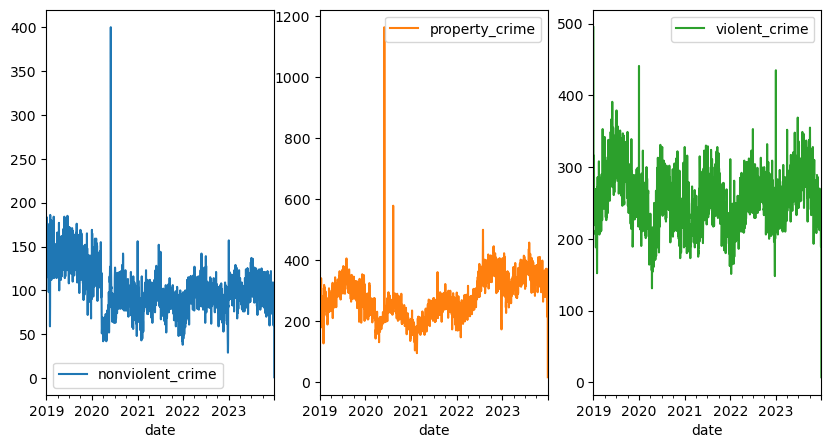

In [35]:
crimes_count_date = df.pivot_table('id', aggfunc=np.size, columns='crime_category', index=df.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.plot(figsize=(10, 5), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

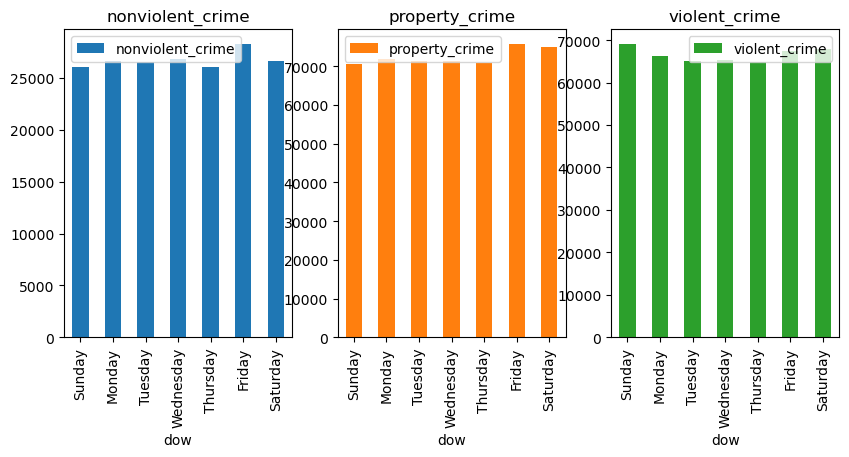

In [36]:
crimes_count_dow = df.pivot_table('id', aggfunc=np.size, columns='crime_category', index=df.dow, fill_value=0).loc[dayOrder]

plo = crimes_count_dow.plot(figsize=(10, 4), subplots=True, layout=(-1, 3), sharex=False, sharey=False, kind='bar')

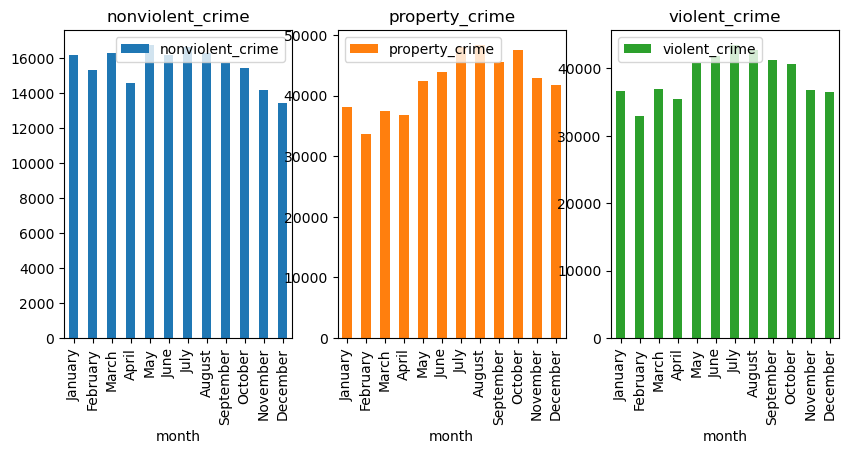

In [37]:
crimes_count_month = df.pivot_table('id', aggfunc=np.size, columns='crime_category', index=df.month, fill_value=0).loc[monthOrder]

plo = crimes_count_month.plot(figsize=(10, 4), subplots=True, layout=(-1, 3), sharex=False, sharey=False, kind='bar')

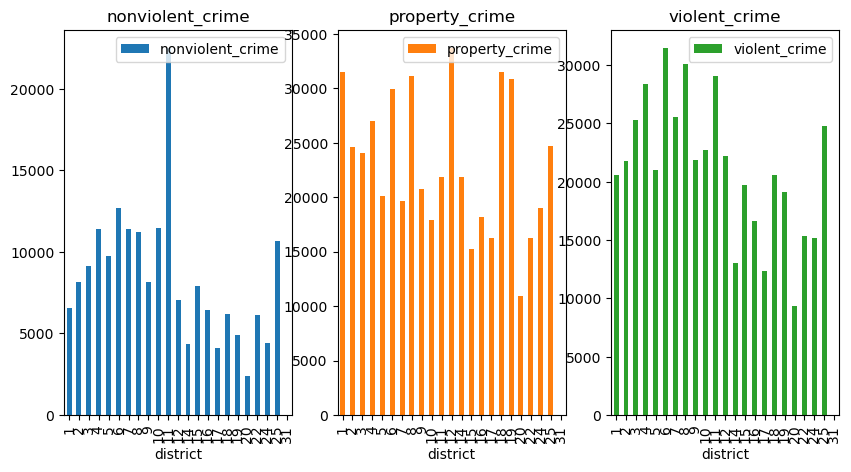

In [38]:
crimes_count_dow = df.pivot_table('id', aggfunc=np.size, columns='crime_category', index=df.district, fill_value=0)

plo = crimes_count_dow.plot(figsize=(10, 5), subplots=True, layout=(-1, 3), sharex=False, sharey=False, kind='bar')

In [58]:
df_line = df.groupby(['crime_category','date'])['id'].count().reset_index()

replacements = {
    'crime_category': {
        'nonviolent_crime':'Nonviolent Crime',
        'violent_crime':'Violent Crime',
        'property_crime':'Property Crime',
    }
}

df_line.replace(replacements, regex=True, inplace=True)

# Create the line plot using plotly version of plot
fig = px.line(df_line, x = 'date', y = 'id', color = 'crime_category',
        title='Categorized Crime Count by Date - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'Date', yaxis_title = 'Counts', legend_title = 'Crime Category')

In [40]:
df_bar = df.groupby(['crime_category','dow'], sort=False)['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.bar(df_bar, x = 'dow', y = 'id', color = 'crime_category',
        title='Categorized Crime Count by Day of Week - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'Categorized', yaxis_title = 'Counts')

In [41]:
df_line = df.groupby(['crime_category','dow'], sort=False)['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.line(df_line, x = 'dow', y = 'id', color = 'crime_category',
        title='Categorized Crime Count by Day of Week - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'DOW', yaxis_title = 'Counts')

In [42]:
df_bar = df.groupby(['crime_category','month'], sort=False)['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.bar(df_bar, x = 'month', y = 'id', color = 'crime_category',
        title='Categorized Crime Count by Month - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'Categorized', yaxis_title = 'Counts')

In [43]:
df_line = df.groupby(['crime_category','month'], sort=False)['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.line(df_line, x = 'month', y = 'id', color = 'crime_category',
        title='Categorized Crime Count by Month - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'Month', yaxis_title = 'Counts')

Text(0.5, 1.05, 'Chicago - Distribution for Number of Crimes Committed by District - 2019-2023')

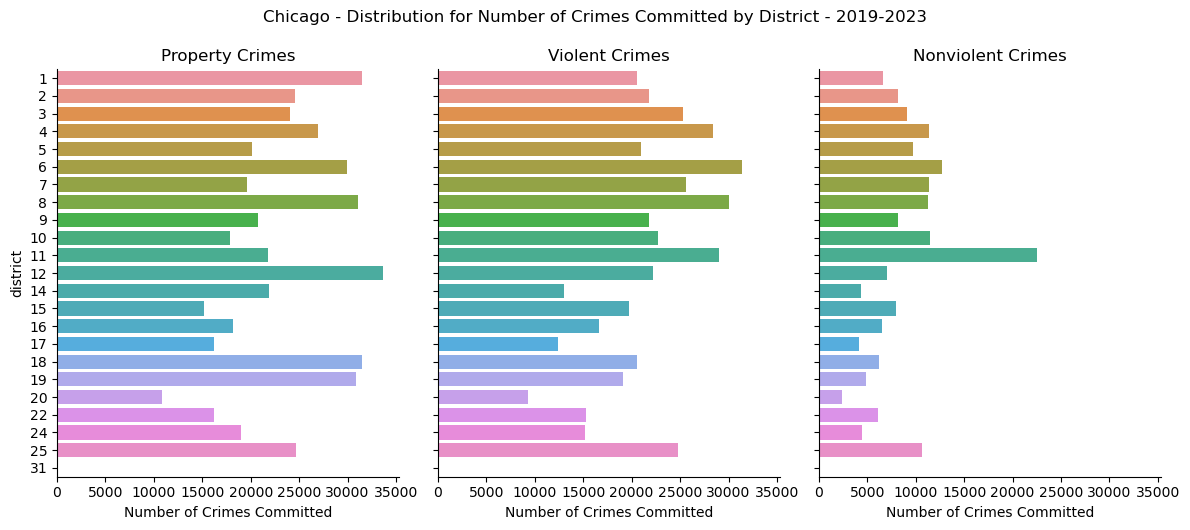

In [66]:
g = sns.catplot(y="district", col="crime_category",
                col_order= df['crime_category'].value_counts()[:3].index
                ,data=df, kind="count",height=5, aspect=.8)
               #order=df['district'].value_counts().index)
g.axes[0,0].set_xlabel('Number of Crimes Committed')
g.axes[0,0].set_title('Property Crimes')

g.axes[0,1].set_xlabel('Number of Crimes Committed')
g.axes[0,1].set_title('Violent Crimes')

g.axes[0,2].set_xlabel('Number of Crimes Committed')
g.axes[0,2].set_title('Nonviolent Crimes')

g.fig.suptitle('Chicago - Distribution for Number of Crimes Committed by District - 2019-2023', y = 1.05)

#### District

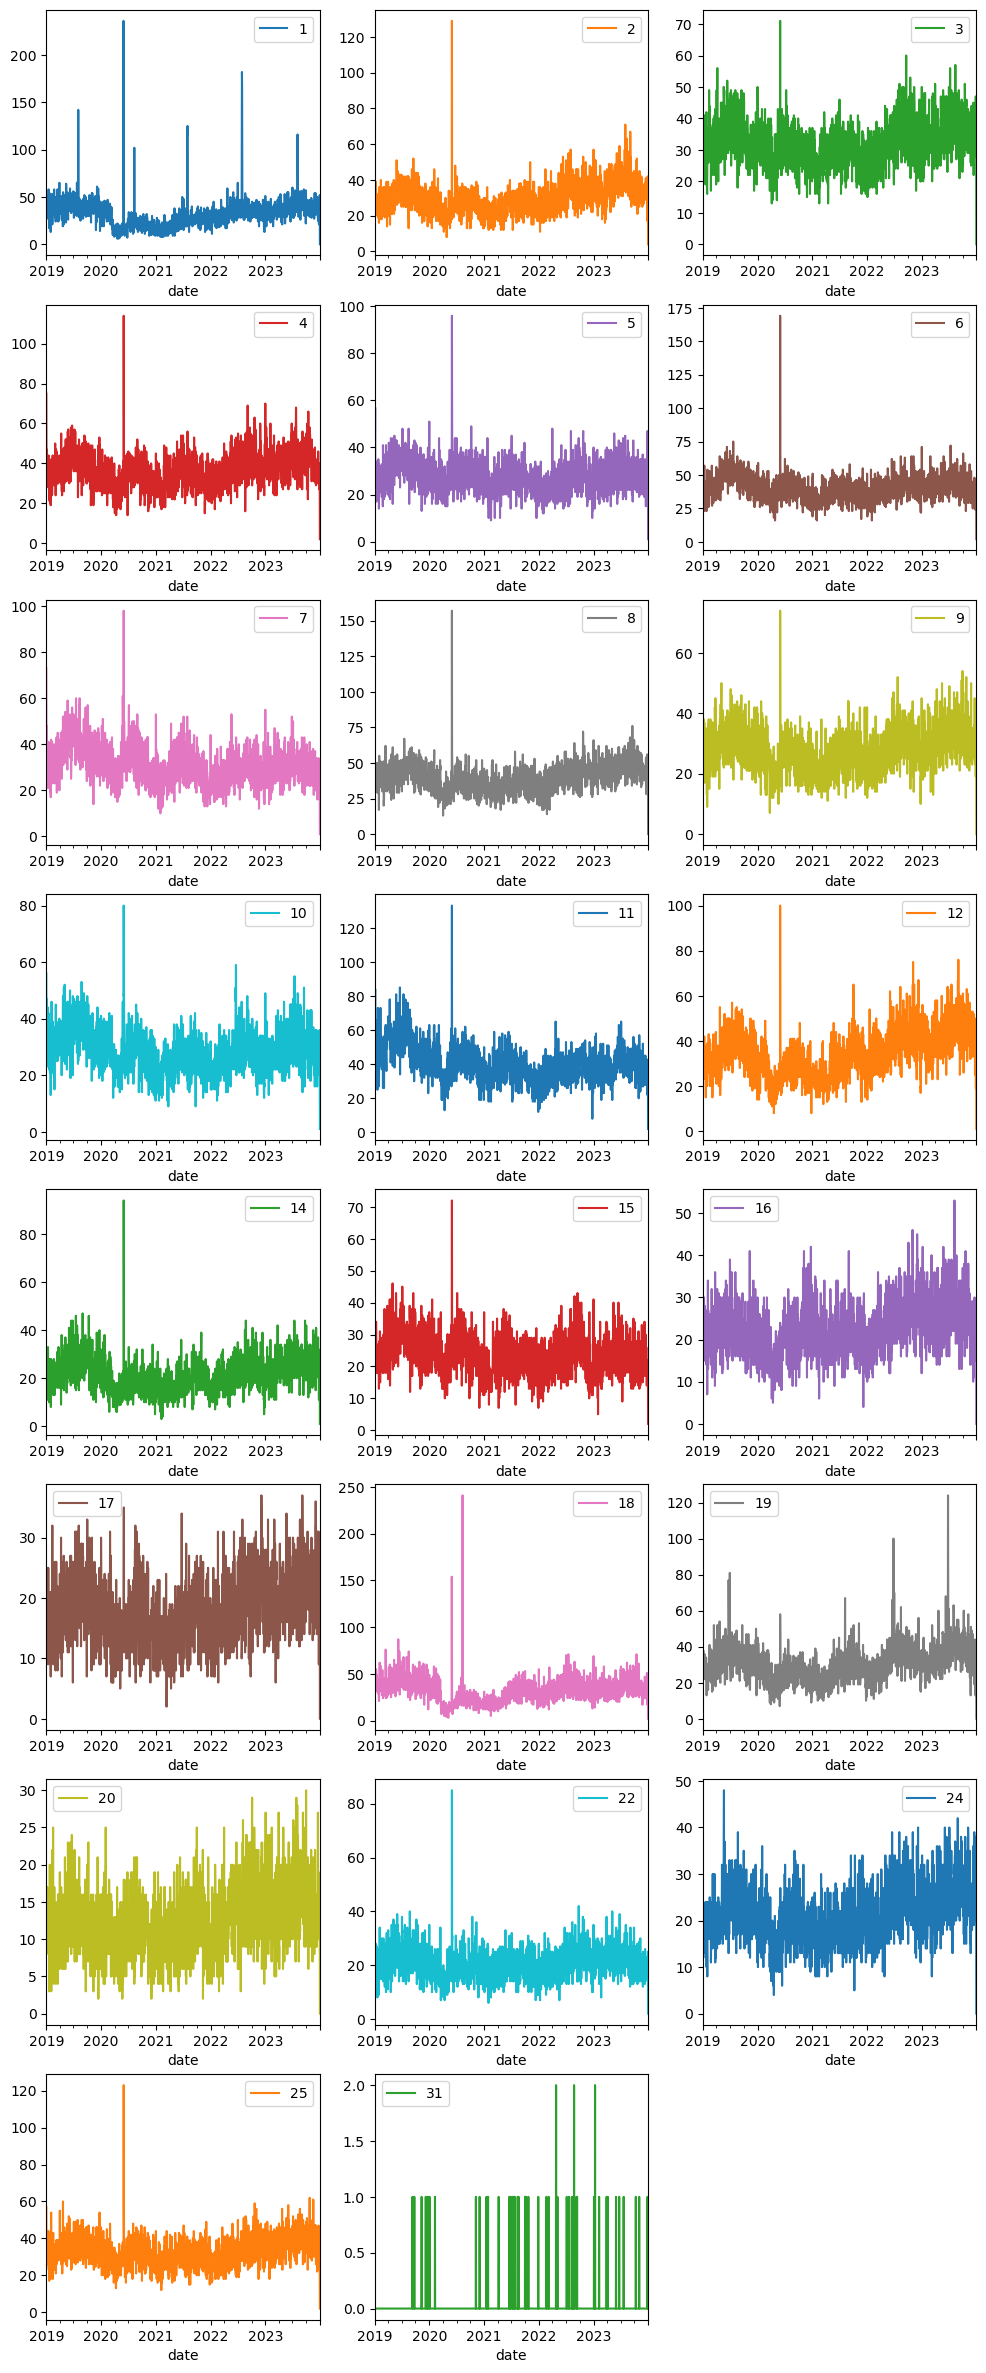

In [44]:
crimes_count_date = df.pivot_table('id', aggfunc=np.size, columns='district', index=df.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

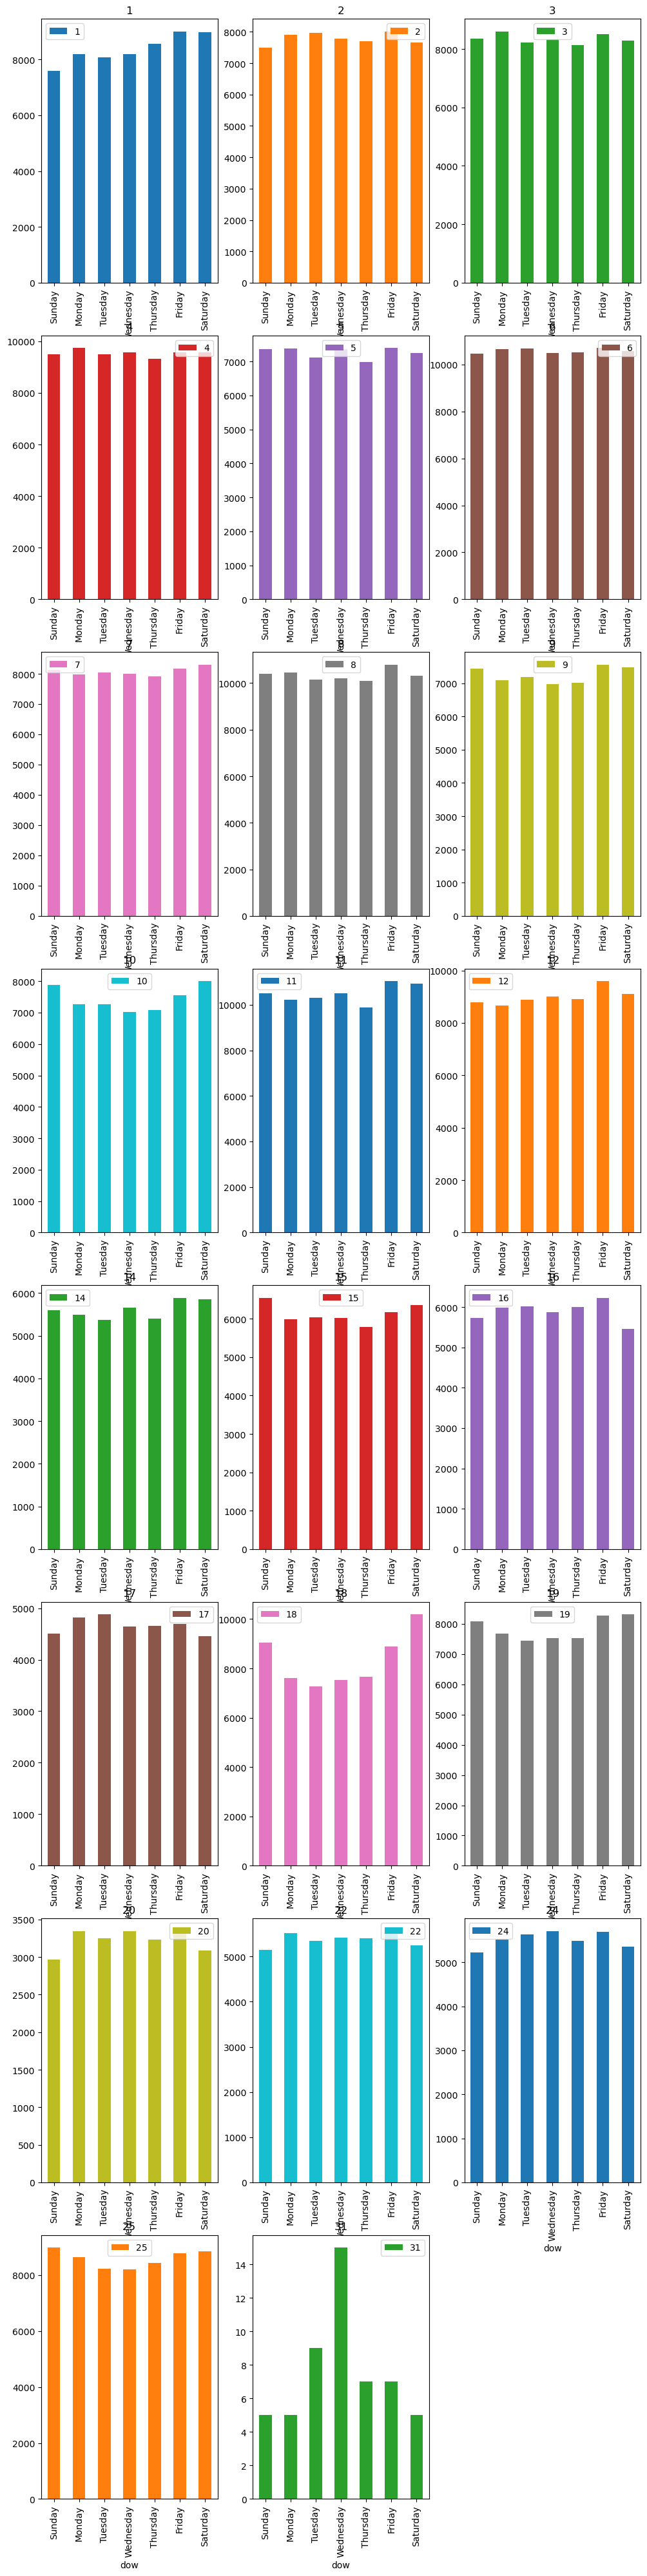

In [45]:
crimes_count_dow = df.pivot_table('id', aggfunc=np.size, columns='district', index=df.dow, fill_value=0).loc[dayOrder]

plo = crimes_count_dow.plot(figsize=(12, 50), subplots=True, layout=(-1, 3), sharex=False, sharey=False, kind='bar')

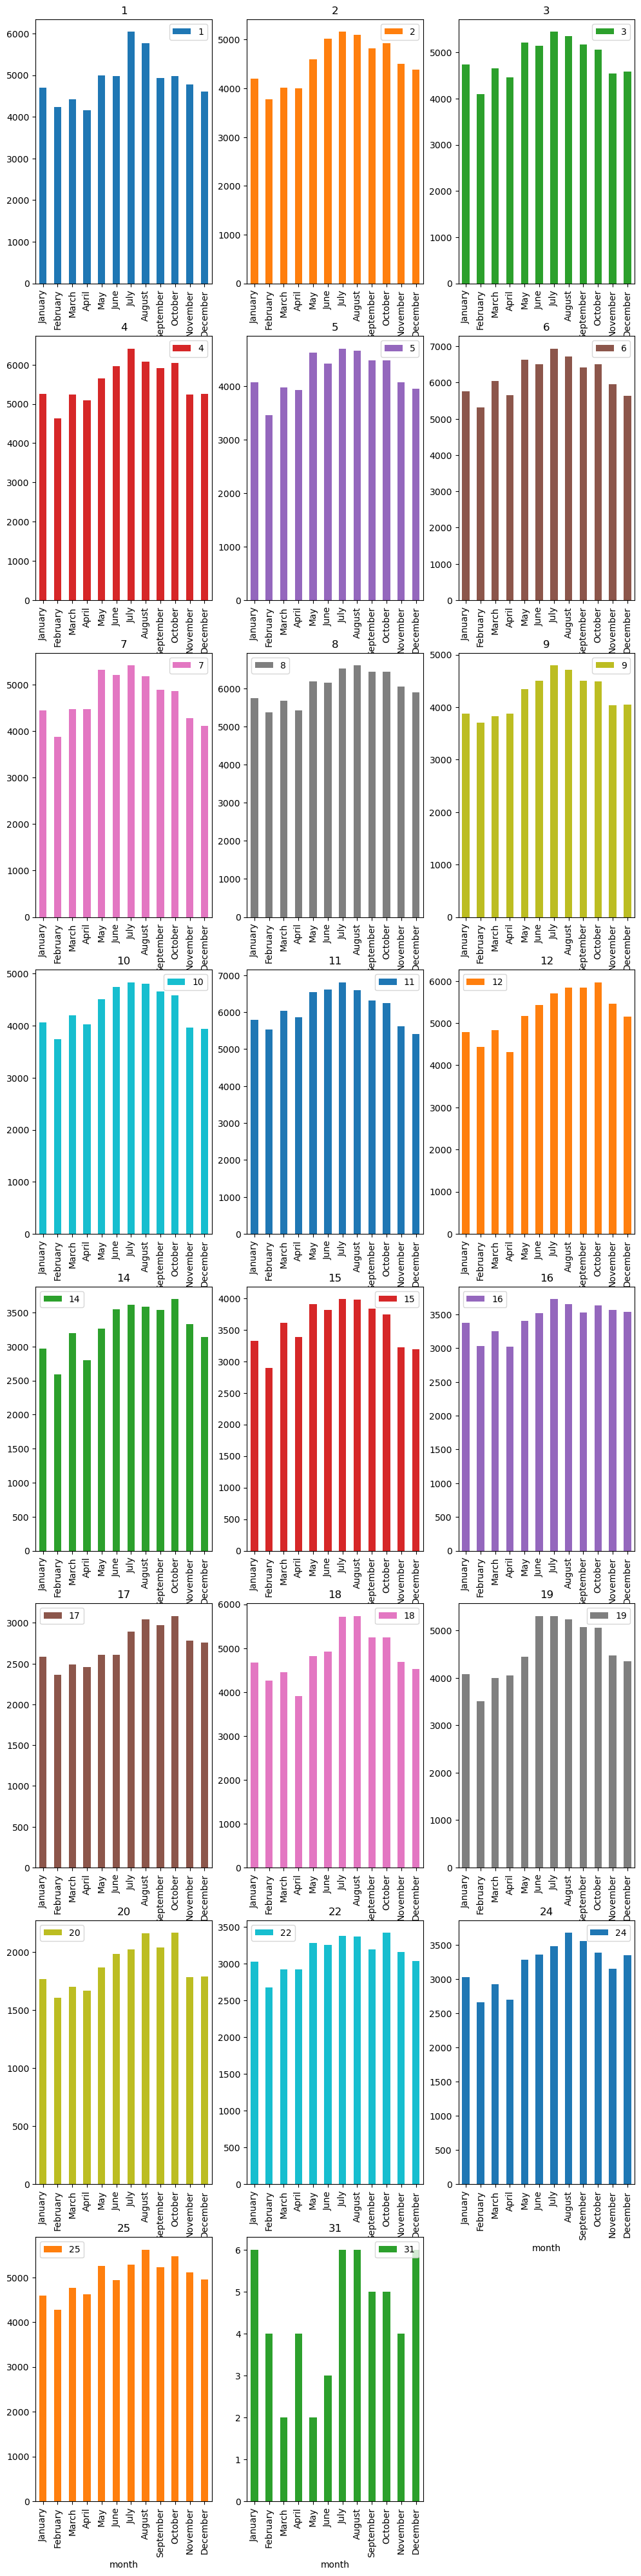

In [46]:
crimes_count_month = df.pivot_table('id', aggfunc=np.size, columns='district', index=df.month, fill_value=0).loc[monthOrder]

plo = crimes_count_month.plot(figsize=(12, 50), subplots=True, layout=(-1, 3), sharex=False, sharey=False, kind='bar')

In [47]:
df_test = df.copy()

df_test['district'] = df_test['district'].astype(str)

df_bar = df_test.groupby(['district'])['id'].count().reset_index()

fig = px.bar(df_bar, x = 'district', y = 'id', barmode = 'group',
             title = 'Counts for Type of Crime Based on Each District', 
             labels = {'id': 'Counts', 'district': 'District'})

fig.update_xaxes(categoryorder = "total descending")

fig.update_layout(height = 600)

In [48]:
df_line = df.groupby(['district','date'])['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.line(df_line, x = 'date', y = 'id', color = 'district',
        title='District Count by Date - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'Date', yaxis_title = 'Counts')

In [49]:
df_line = df.groupby(['district','dow'], sort=False)['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.line(df_line, x = 'dow', y = 'id', color = 'district',
        title='District Count by Day of Week - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'DOW', yaxis_title = 'Counts')

In [50]:
df_line = df.groupby(['district','dow'])['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.bar(df_line, x = 'dow', y = 'id', color = 'district',
        title='District Count by Day of Week - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'DOW', yaxis_title = 'Counts')

In [51]:
df_line = df.groupby(['district','month'], sort=False)['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.line(df_line, x = 'month', y = 'id', color = 'district',
        title='District Count by Month - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'Month', yaxis_title = 'Counts')

In [52]:
df['month_num'] = df['month_num'].astype(int)

df_bar = df.groupby(['month_num','district'], sort=False)['id'].count().reset_index()

# Create the line plot using plotly version of plot
fig = px.bar(df_bar, x = 'district', y = 'id', color = 'month_num',
        title='Counts for District by Month - 2019-2023')  

# Add the layout with the x- and y-aixs labels 
fig.update_layout(height = 600, xaxis_title = 'District', yaxis_title = 'Counts')

In [53]:
df.describe()

id          beat      district          ward  community_area  \
count  1.159419e+06  1.159419e+06  1.159419e+06  1.159419e+06    1.159419e+06   
mean   1.240679e+07  1.147026e+03  1.124114e+01  2.315206e+01    3.678894e+01   
std    8.488243e+05  7.022654e+02  7.017838e+00  1.394222e+01    2.152857e+01   
min    2.436800e+04  1.110000e+02  1.000000e+00  1.000000e+00    1.000000e+00   
25%    1.198674e+07  6.110000e+02  6.000000e+00  1.000000e+01    2.300000e+01   
50%    1.244283e+07  1.024000e+03  1.000000e+01  2.400000e+01    3.200000e+01   
75%    1.289275e+07  1.723000e+03  1.700000e+01  3.400000e+01    5.400000e+01   
max    1.333384e+07  2.535000e+03  3.100000e+01  5.000000e+01    7.700000e+01   

       x_coordinate  y_coordinate      latitude     longitude  \
count  1.159419e+06  1.159419e+06  1.159419e+06  1.159419e+06   
mean   1.165154e+06  1.886357e+06  4.184375e+01 -8.766945e+01   
std    1.649087e+04  3.188269e+04  8.768758e-02  5.997641e-02   
min    0.000000e+00  0.000000e+00  3.661945e+01 -9.168657e+01   
25%    1.153517e+06  1.858786e+06  4.176788e+01 -8.771173e+01   
50%    1.166975e+06  1.892551e+06  4.186081e+01 -8.766293e+01   
75%    1.176740e+06  1.909321e+06  4.190686e+01 -8.762710e+01   
max    1.205119e+06  1.951527e+06  4.202259e+01 -8.752453e+01   

       location.latitude  location.longitude     month_num  
count       1.159419e+06        1.159419e+06  1.159419e+06  
mean        4.184375e+01       -8.766945e+01  6.634149e+00  
std         8.768758e-02        5.997641e-02  3.366795e+00  
min         3.661945e+01       -9.168657e+01  1.000000e+00  
25%         4.176788e+01       -8.771173e+01  4.000000e+00  
50%         4.186081e+01       -8.766293e+01  7.000000e+00  
75%         4.190686e+01       -8.762710e+01  9.000000e+00  
max         4.202259e+01       -8.752453e+01  1.200000e+01

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'beat'}>,
        <Axes: title={'center': 'district'}>],
       [<Axes: title={'center': 'ward'}>,
        <Axes: title={'center': 'community_area'}>,
        <Axes: title={'center': 'x_coordinate'}>],
       [<Axes: title={'center': 'y_coordinate'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'location.latitude'}>,
        <Axes: title={'center': 'location.longitude'}>,
        <Axes: title={'center': 'month_num'}>]], dtype=object)

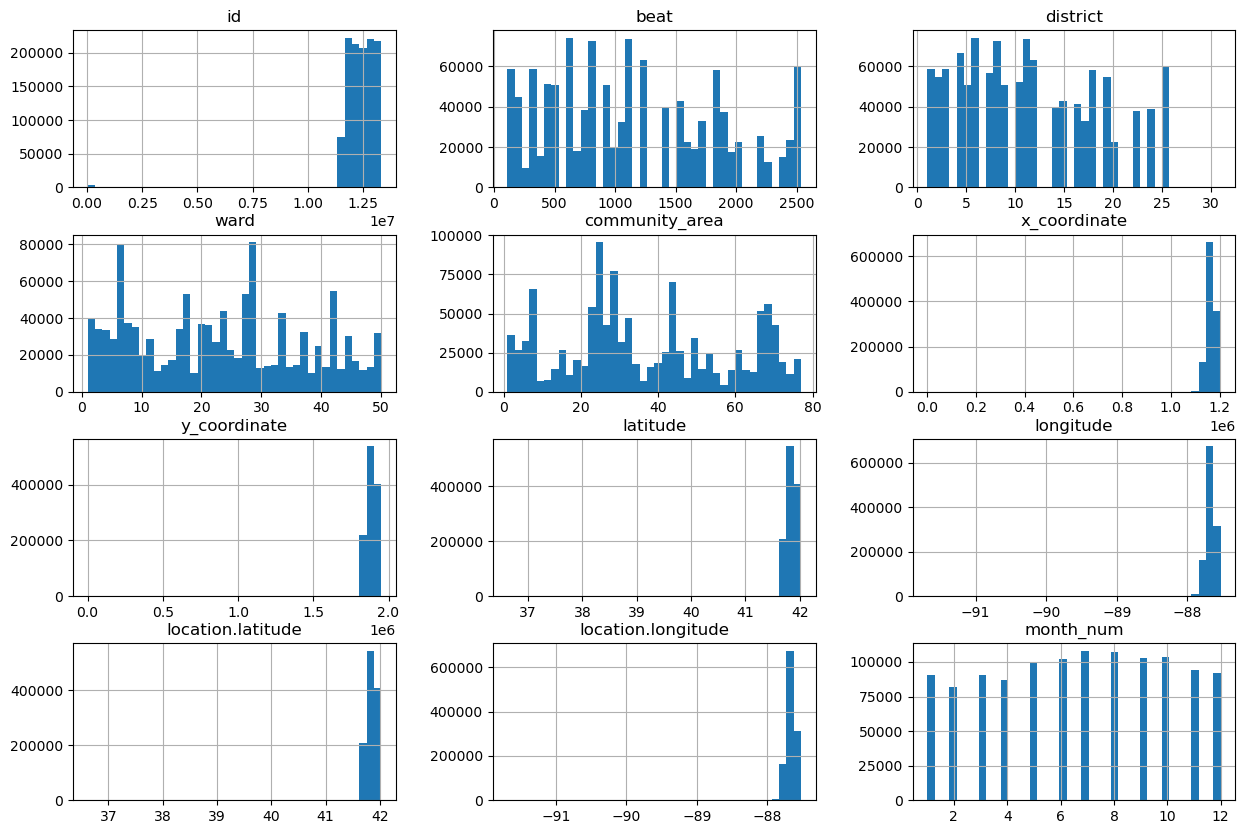

In [54]:
df.hist(bins=40, figsize=(15, 10))

In [55]:
# Correlation matrix for all numerical variables
columns = ['beat', 'district', 'ward', 'community_area', 'x_coordinate', 'y_coordinate', 'latitude', 'longitude']

# Create the correlation matrix for the correlation
df_corr = df[columns]

# Run the correlation matrix 
df_corr.corr()

beat  district      ward  community_area  x_coordinate  \
beat            1.000000  0.999756  0.654406       -0.485022     -0.544171   
district        0.999756  1.000000  0.655433       -0.485388     -0.545332   
ward            0.654406  0.655433  1.000000       -0.521722     -0.473935   
community_area -0.485022 -0.485388 -0.521722        1.000000      0.239523   
x_coordinate   -0.544171 -0.545332 -0.473935        0.239523      1.000000   
y_coordinate    0.633961  0.635096  0.676450       -0.761697     -0.524659   
latitude        0.634703  0.635841  0.676814       -0.760939     -0.527193   
longitude      -0.539491 -0.540644 -0.467942        0.230143      0.999894   

                y_coordinate  latitude  longitude  
beat                0.633961  0.634703  -0.539491  
district            0.635096  0.635841  -0.540644  
ward                0.676450  0.676814  -0.467942  
community_area     -0.761697 -0.760939   0.230143  
x_coordinate       -0.524659 -0.527193   0.999894  
y_coordinate        1.000000  0.999994  -0.515248  
latitude            0.999994  1.000000  -0.517813  
longitude          -0.515248 -0.517813   1.000000

Text(0.5, 1.0, 'Heatmap')

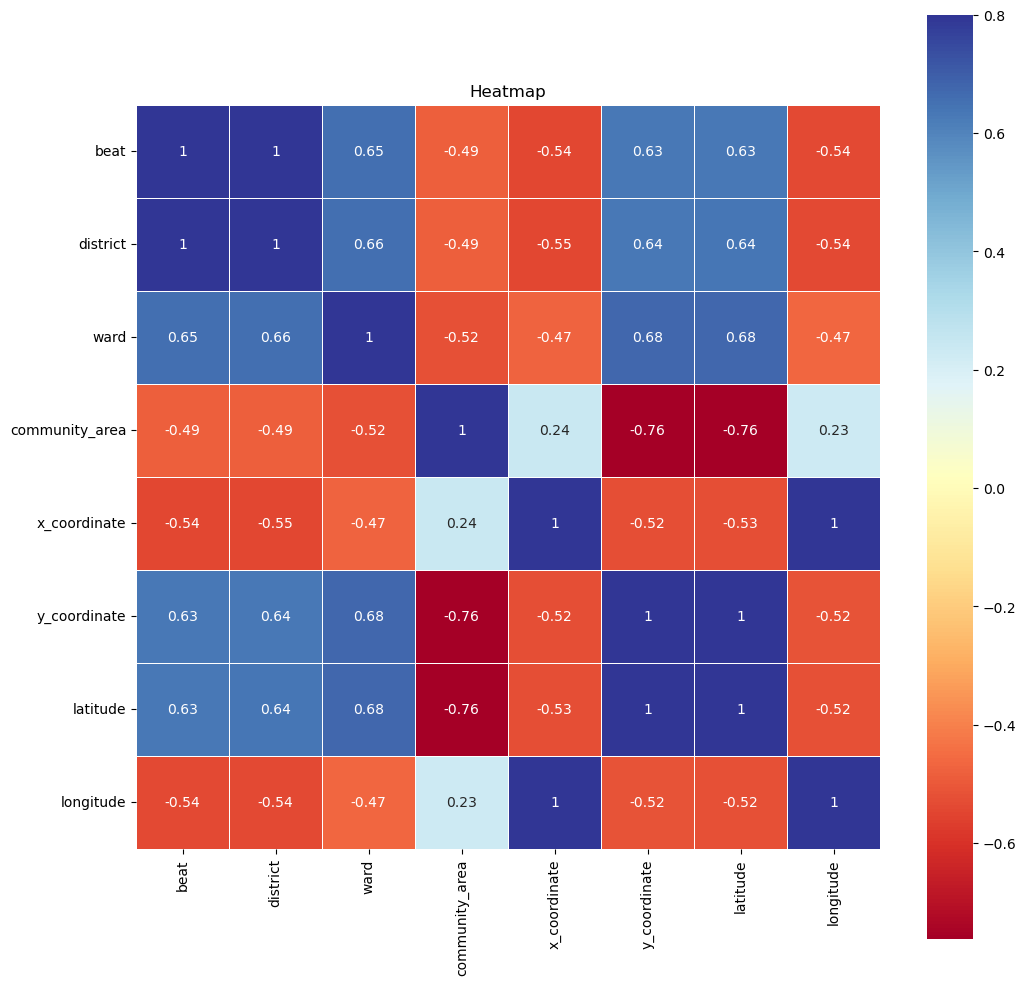

In [56]:
# Set up the heatmap 
corrmat = df_corr.corr()

# Set up the figure size
f, ax = plt.subplots(figsize=(12,12))

# Create the heatmap and create the parameters
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='RdYlBu', linewidths=.5 )
plt.title('Heatmap')